In [1]:
import pandas as pd
file_path = "/content/fake_currency_data.csv"
data = pd.read_csv(file_path)

In [2]:
data.head()

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness
0,USA,$100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488
1,USA,$20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119
2,EU,€10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393
3,USA,€20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114
4,EU,€20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438


In [3]:
data.tail()

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness
511473,USA,$20,0,89737949,Hologram,1.388623,154.448282,64.823803,0.093112
511474,EU,$5,0,15316570,Hologram,2.162538,156.243609,75.590738,0.092503
511475,USA,£10,0,95387689,Watermark,1.629794,131.771713,68.570438,0.061454
511476,EU,€20,0,96741832,Security Thread,2.438072,132.581646,77.208645,0.096780
511477,EU,$100,1,47988778,Hologram,2.336478,139.405777,70.519039,0.057370


In [4]:
data.describe()

,Counterfeit,SerialNumber,Weight,Length,Width,Thickness
count,511478.000000,5.114780e+05,511478.000000,511478.000000,511478.000000,511478.000000
mean,0.499437,5.505275e+07,1.649437,140.042095,70.010017,0.075010
std,0.500000,2.599363e+07,0.490862,11.545591,5.770196,0.014442
min,0.000000,1.000021e+07,0.800007,120.000086,60.000005,0.050000
25%,0.000000,3.250173e+07,1.224571,130.055298,65.009640,0.062505
50%,0.000000,5.513584e+07,1.648919,140.067245,70.011849,0.074999
75%,1.000000,7.756527e+07,2.073774,150.042194,75.008292,0.087519
max,1.000000,9.999994e+07,2.499997,159.999961,79.999983,0.100000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511478 entries, 0 to 511477
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country           511478 non-null  object 
 1   Denomination      511478 non-null  object 
 2   Counterfeit       511478 non-null  int64  
 3   SerialNumber      511478 non-null  int64  
 4   SecurityFeatures  511478 non-null  object 
 5   Weight            511478 non-null  float64
 6   Length            511478 non-null  float64
 7   Width             511478 non-null  float64
 8   Thickness         511478 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.1+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Country             0
Denomination        0
Counterfeit         0
SerialNumber        0
SecurityFeatures    0
Weight              0
Length              0
Width               0
Thickness           0
dtype: int64

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA ANALYSIS

What is the distribution of counterfeit bills across different countries and denominations?

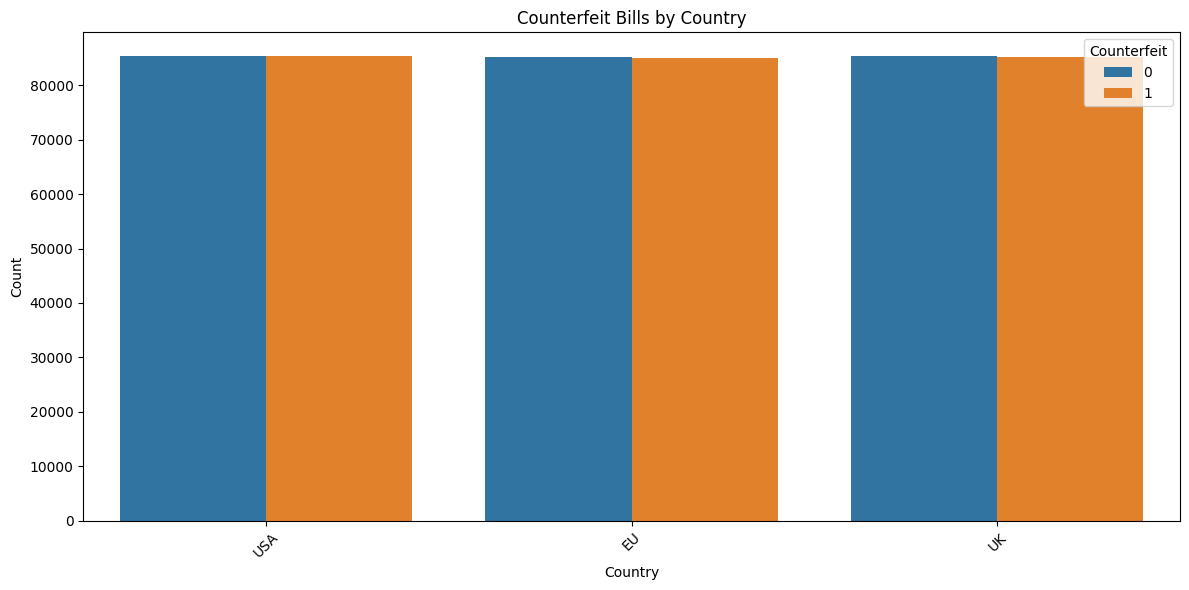

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Country", hue="Counterfeit")
plt.title("Counterfeit Bills by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Counterfeit", loc="upper right")
plt.tight_layout()
plt.show()

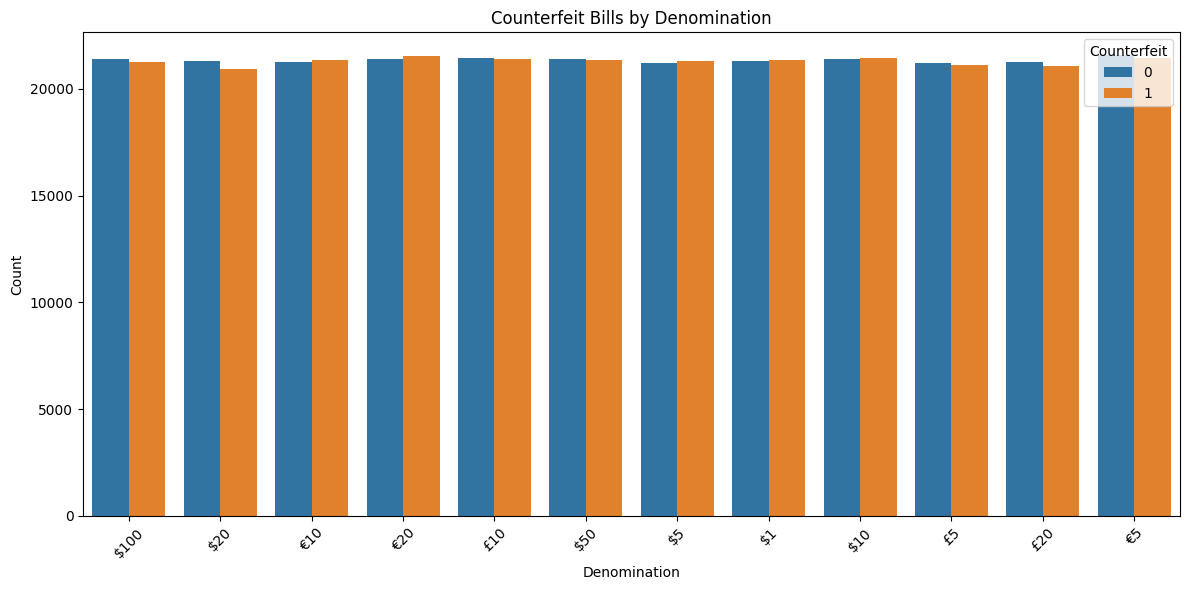

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Denomination", hue="Counterfeit")
plt.title("Counterfeit Bills by Denomination")
plt.xlabel("Denomination")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Counterfeit", loc="upper right")
plt.tight_layout()
plt.show()

Are there any patterns or correlations between security features and the likelihood of counterfeit bills?

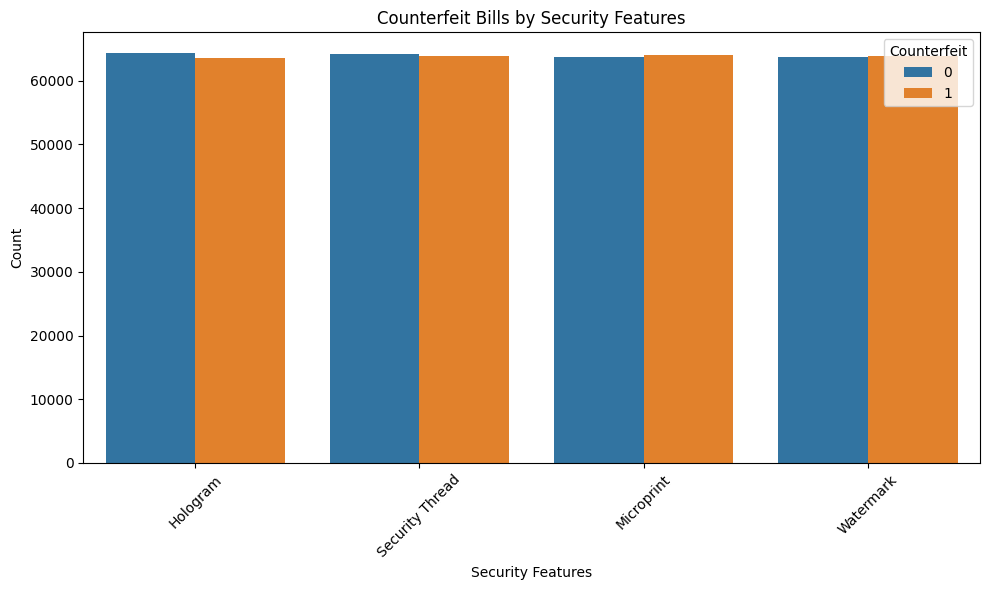

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="SecurityFeatures", hue="Counterfeit")
plt.title("Counterfeit Bills by Security Features")
plt.xlabel("Security Features")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Counterfeit", loc="upper right")
plt.tight_layout()
plt.show()

In [12]:
corr_matrix = data.groupby("Counterfeit")["SecurityFeatures"].value_counts(normalize=True).unstack()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
SecurityFeatures  Hologram  Microprint  Security Thread  Watermark
Counterfeit                                                       
0                 0.251477    0.248919         0.250876   0.248728
1                 0.249026    0.250948         0.250138   0.249887


How do the physical characteristics (weight, length, width, thickness) vary across different countries and denominations, and do these characteristics relate to counterfeit occurrences?

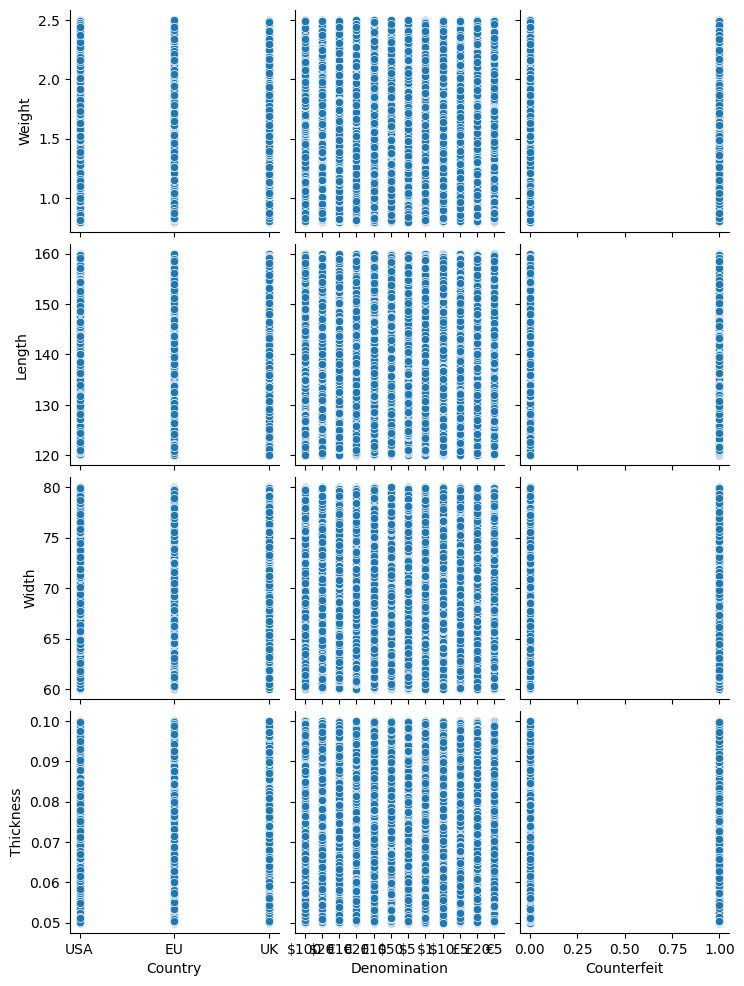

In [13]:
sns.pairplot(data = data, x_vars = ['Country', 'Denomination', 'Counterfeit'],
             y_vars = ['Weight', 'Length', 'Width', 'Thickness'])
plt.show()

Are certain serial number ranges or patterns more prevalent for counterfeit bills?

In [14]:
grouped_data = data.groupby(['Country', 'Counterfeit'])
for group_name, group_data in grouped_data:
    if group_name[1] == 1:  # Only consider counterfeit bills
        serial_numbers = group_data['SerialNumber'].tolist()
        serial_patterns = [str(serial)[-4:] for serial in serial_numbers]  # Extract last 4 digits as pattern
        common_patterns = pd.Series(serial_patterns).value_counts()
        print(f"Country: {group_name[0]} - Counterfeit: {group_name[1]}")
        print(common_patterns)

Country: EU - Counterfeit: 1
1676    22
9117    21
1495    21
5424    21
7384    20
        ..
2795     1
8703     1
4917     1
0173     1
8164     1
Name: count, Length: 9996, dtype: int64
Country: UK - Counterfeit: 1
2658    22
5761    21
3189    20
7570    20
0223    19
        ..
6721     1
8057     1
3578     1
1436     1
1899     1
Name: count, Length: 9999, dtype: int64
Country: USA - Counterfeit: 1
1841    21
6607    21
9172    20
6986    20
7539    20
        ..
1407     1
2734     1
1131     1
7690     1
8868     1
Name: count, Length: 9998, dtype: int64


What is the range and distribution of physical characteristics for genuine bills compared to counterfeit bills?

In [15]:
data['Counterfeit'] = data['Counterfeit'].astype('category')

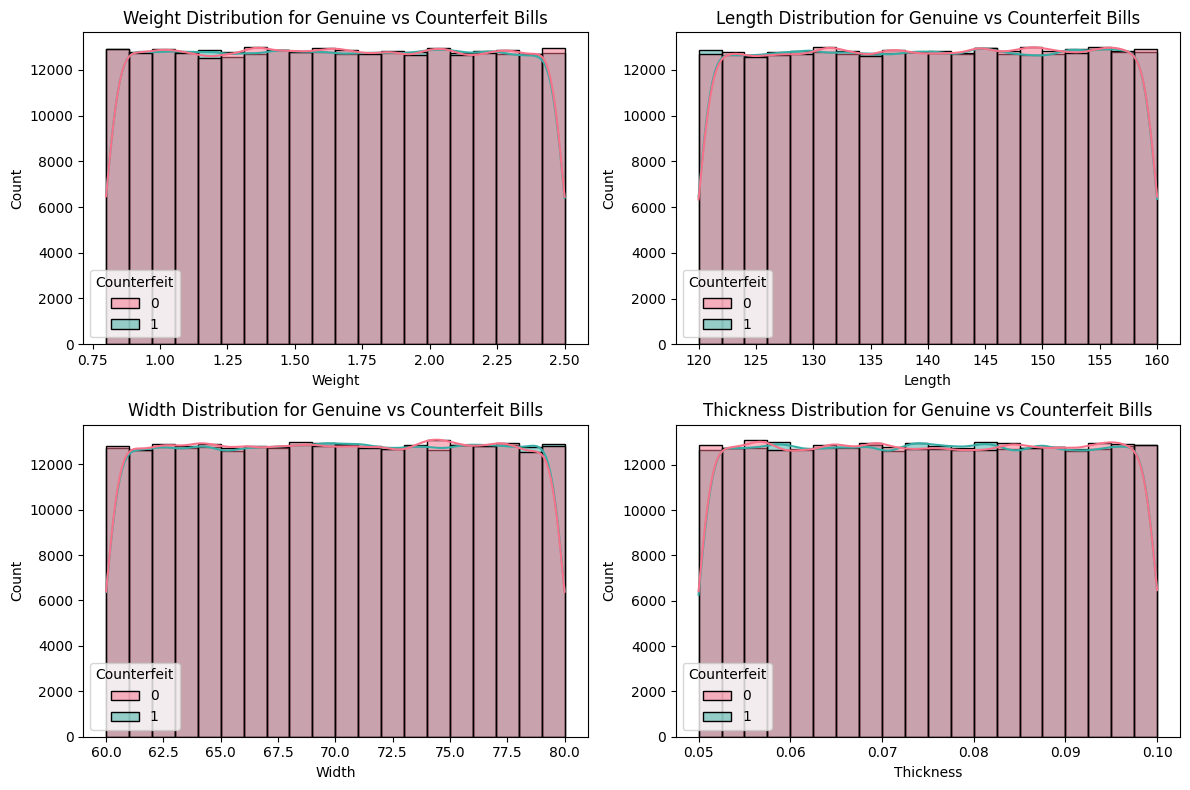

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=data, x="Weight", hue="Counterfeit", bins=20, kde=True, palette="husl", alpha=0.5)
plt.title("Weight Distribution for Genuine vs Counterfeit Bills")
plt.subplot(2, 2, 2)
sns.histplot(data=data, x="Length", hue="Counterfeit", bins=20, kde=True, palette="husl", alpha=0.5)
plt.title("Length Distribution for Genuine vs Counterfeit Bills")
plt.subplot(2, 2, 3)
sns.histplot(data=data, x="Width", hue="Counterfeit", bins=20, kde=True, palette="husl", alpha=0.5)
plt.title("Width Distribution for Genuine vs Counterfeit Bills")
plt.subplot(2, 2, 4)
sns.histplot(data=data, x="Thickness", hue="Counterfeit", bins=20, kde=True, palette="husl", alpha=0.5)
plt.title("Thickness Distribution for Genuine vs Counterfeit Bills")

plt.tight_layout()
plt.show()

Are there any outliers or anomalies in the data that may warrant further investigation?

In [17]:
data['Counterfeit'] = data['Counterfeit'].astype('category')

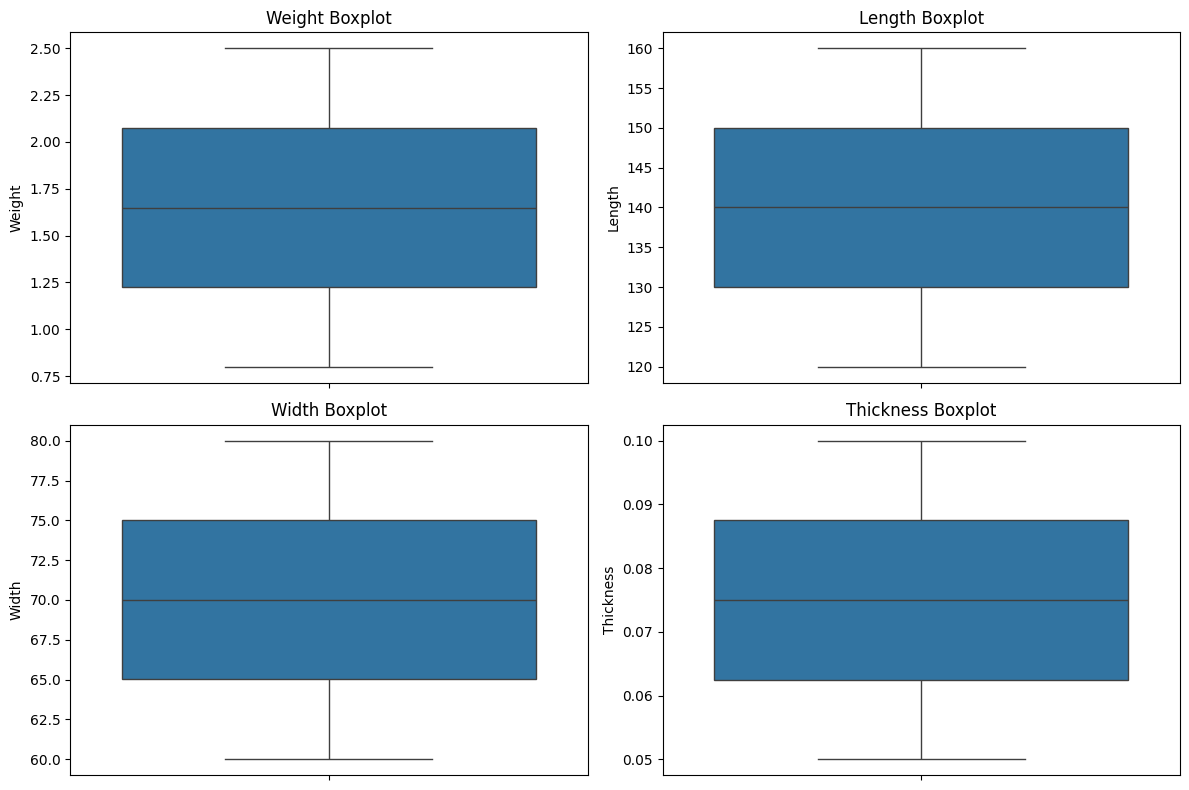

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, y="Weight")
plt.title("Weight Boxplot")
plt.subplot(2, 2, 2)
sns.boxplot(data=data, y="Length")
plt.title("Length Boxplot")
plt.subplot(2, 2, 3)
sns.boxplot(data=data, y="Width")
plt.title("Width Boxplot")
plt.subplot(2, 2, 4)
sns.boxplot(data=data, y="Thickness")
plt.title("Thickness Boxplot")

plt.tight_layout()
plt.show()

Can you identify any potential data quality issues or inconsistencies in the dataset?

In [24]:
data.duplicated().sum()

0

In [25]:
data.isnull().sum()

Country             0
Denomination        0
Counterfeit         0
SerialNumber        0
SecurityFeatures    0
Weight              0
Length              0
Width               0
Thickness           0
Index               0
dtype: int64

How does the proportion of counterfeit bills vary across different countries and denominations?

In [19]:
counterfeit_by_country = data.groupby('Country')['Counterfeit'].value_counts(normalize=True).unstack().fillna(0)
print("Proportion of Counterfeit Bills by Country:")
print(counterfeit_by_country)

Proportion of Counterfeit Bills by Country:
Counterfeit         0         1
Country                        
EU           0.500766  0.499234
UK           0.500596  0.499404
USA          0.500328  0.499672


In [20]:
counterfeit_by_denomination = data.groupby('Denomination')['Counterfeit'].value_counts(normalize=True).unstack().fillna(0)
print("\nProportion of Counterfeit Bills by Denomination:")
print(counterfeit_by_denomination)


Proportion of Counterfeit Bills by Denomination:
Counterfeit          0         1
Denomination                    
$1            0.499074  0.500926
$10           0.499591  0.500409
$100          0.501641  0.498359
$20           0.504109  0.495891
$5            0.499118  0.500882
$50           0.500351  0.499649
£10           0.500537  0.499463
£20           0.502599  0.497401
£5            0.501442  0.498558
€10           0.498849  0.501151
€20           0.498322  0.501678
€5            0.501185  0.498815


Can you perform any statistical analysis (e.g., correlation, regression) to identify significant predictors or factors related to counterfeit occurrences?

In [21]:
correlation_matrix = data[['Weight', 'Length', 'Width', 'Thickness']].corr()

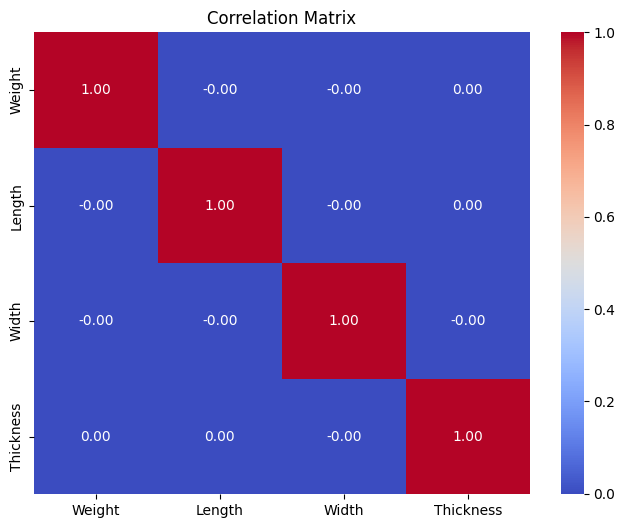

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Are there any observable trends or patterns in the data over time (if time-series data is available)?

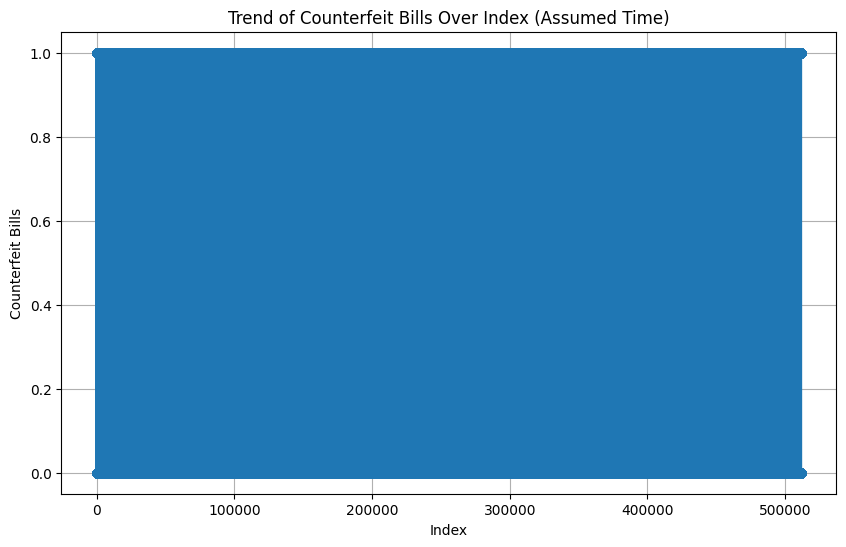

In [23]:
data['Index'] = range(1, len(data) + 1)
plt.figure(figsize = (10, 6))
plt.plot(data['Index'], data['Counterfeit'], marker='o', linestyle='-')
plt.title('Trend of Counterfeit Bills Over Index (Assumed Time)')
plt.xlabel('Index')
plt.ylabel('Counterfeit Bills')
plt.grid(True)
plt.show()